In [1]:
import pyspark


In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

from pyspark.mllib.feature import StandardScaler, PCA
from pyspark.ml.feature import VectorAssembler
from pyspark.mllib.stat import Statistics


In [4]:
spark = SparkSession.builder.appName('TestSpark').getOrCreate()


23/11/16 17:48:01 WARN Utils: Your hostname, MyPc resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/11/16 17:48:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/16 17:48:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/11/16 17:48:03 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [8]:
print(spark.version)

3.5.0


In [56]:
df_te = spark.read.option('header','true').csv("hdfs://localhost:9000/user/survey.csv",inferSchema=True)
df_te.show(5)

+----------+-----+----------+--------------+--------------+------------------+--------------------+--------------------+--------------------+--------------------+----------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------------+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+------+----------+---------------+--------------+--------------------+-------------------+--------------------+--------

In [9]:
df = spark.read.csv("hdfs://localhost:9000/user/survey.csv", header=True)
df.show(5)

23/11/16 18:09:04 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----------+-----+----------+--------------+--------------+------------------+--------------------+--------------------+--------------------+--------------------+----------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------------+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+------+----------+---------------+--------------+--------------------+-------------------+--------------------+--------

In [11]:
df.createOrReplaceTempView('s')

In [14]:
spark.sql("select Salary from s").show()

+------+
|Salary|
+------+
|    NA|
| 51000|
|    NA|
|    NA|
|260000|
| 30000|
|120000|
|    NA|
|250000|
|    NA|
|    NA|
|    NA|
|    NA|
|    NA|
|     0|
|    NA|
|    NA|
| 32000|
|    NA|
|    NA|
+------+
only showing top 20 rows



In [15]:
spark.sql("select count(*) from s").show()

+--------+
|count(1)|
+--------+
|   98855|
+--------+



In [18]:
spark.sql("select avg(age) from s").show()

+--------+
|avg(age)|
+--------+
|    NULL|
+--------+



In [19]:
df.describe().show()

23/11/16 21:02:37 WARN DAGScheduler: Broadcasting large task binary with size 1227.9 KiB


+-------+------------------+-----+----------+-----------+--------------+------------------+--------------------+--------------------+--------------------+--------------------+-----------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-----------

In [20]:
df.head()

Row(Respondent='1', Hobby='Yes', OpenSource='No', Country='Kenya', Student='No', Employment='Employed part-time', FormalEducation='Bachelor’s degree (BA, BS, B.Eng., etc.)', UndergradMajor='Mathematics or statistics', CompanySize='20 to 99 employees', DevType='Full-stack developer', YearsCoding='3-5 years', YearsCodingProf='3-5 years', JobSatisfaction='Extremely satisfied', CareerSatisfaction='Extremely satisfied', HopeFiveYears='Working as a founder or co-founder of my own company', JobSearchStatus='I’m not actively looking, but I am open to new opportunities', LastNewJob='Less than a year ago', AssessJob1='10', AssessJob2='7', AssessJob3='8', AssessJob4='1', AssessJob5='2', AssessJob6='5', AssessJob7='3', AssessJob8='4', AssessJob9='9', AssessJob10='6', AssessBenefits1='NA', AssessBenefits2='NA', AssessBenefits3='NA', AssessBenefits4='NA', AssessBenefits5='NA', AssessBenefits6='NA', AssessBenefits7='NA', AssessBenefits8='NA', AssessBenefits9='NA', AssessBenefits10='NA', AssessBenefit

In [21]:
df.printSchema()

root
 |-- Respondent: string (nullable = true)
 |-- Hobby: string (nullable = true)
 |-- OpenSource: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Student: string (nullable = true)
 |-- Employment: string (nullable = true)
 |-- FormalEducation: string (nullable = true)
 |-- UndergradMajor: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- DevType: string (nullable = true)
 |-- YearsCoding: string (nullable = true)
 |-- YearsCodingProf: string (nullable = true)
 |-- JobSatisfaction: string (nullable = true)
 |-- CareerSatisfaction: string (nullable = true)
 |-- HopeFiveYears: string (nullable = true)
 |-- JobSearchStatus: string (nullable = true)
 |-- LastNewJob: string (nullable = true)
 |-- AssessJob1: string (nullable = true)
 |-- AssessJob2: string (nullable = true)
 |-- AssessJob3: string (nullable = true)
 |-- AssessJob4: string (nullable = true)
 |-- AssessJob5: string (nullable = true)
 |-- AssessJob6: string (nullable = true)
 |-- A

In [22]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [23]:
df.select('Respondent','Hobby').show(5)

+----------+-----+
|Respondent|Hobby|
+----------+-----+
|         1|  Yes|
|         3|  Yes|
|         4|  Yes|
|         5|   No|
|         7|  Yes|
+----------+-----+
only showing top 5 rows



In [24]:
spark.sql("""
Select Respondent
from s
where salary >1000
""").show()

+----------+
|Respondent|
+----------+
|         3|
|         7|
|         8|
|         9|
|        11|
|        27|
|        33|
|        38|
|        39|
|        41|
|        43|
|        44|
|        47|
|        51|
|        52|
|        54|
|        56|
|        61|
|        63|
|        66|
+----------+
only showing top 20 rows



In [67]:
# Start preprocessing
from pyspark.sql.functions import col,count,isnan,when

In [131]:
df_cleaned = df.replace("NA",None).replace("",None)

miss_value = df_cleaned.select([count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in df_cleaned.columns])

# Total number of rows in the DataFrame
total_rows = df_cleaned.count()

# Calculate missing value percentages
miss_value_percent = [int(100 * miss_value.collect()[0][i] / total_rows) for i in range(len(miss_value.columns))]

# Create a DataFrame with column names and corresponding missing value percentages
miss_table = spark.createDataFrame(list(zip(df_cleaned.columns, miss_value_percent)), schema=['column', 'miss_percent'])

# Show the result
miss_table = miss_table.orderBy(col('miss_percent').desc())
miss_table.show()

+--------------------+------------+
|              column|miss_percent|
+--------------------+------------+
|   TimeAfterBootcamp|          93|
|          MilitaryUS|          84|
|    HackathonReasons|          74|
|    ErgonomicDevices|          65|
|    AdBlockerReasons|          61|
|StackOverflowJobs...|          61|
| JobEmailPriorities1|          53|
| JobEmailPriorities2|          53|
| JobEmailPriorities3|          53|
| JobEmailPriorities4|          53|
| JobEmailPriorities5|          53|
| JobEmailPriorities6|          53|
| JobEmailPriorities7|          53|
|     ConvertedSalary|          51|
|JobContactPriorit...|          50|
|JobContactPriorit...|          50|
|JobContactPriorit...|          50|
|JobContactPriorit...|          50|
|JobContactPriorit...|          50|
|              Salary|          48|
+--------------------+------------+
only showing top 20 rows



In [132]:
df_cleaned=df_cleaned.drop('Respondent', 'MilitaryUS', 'TimeAfterBootcamp', 
         'HackathonReasons', 'ErgonomicDevices', 'AdBlockerReasons', 
         'StackOverflowJobsRecommend')
df_cleaned=df_cleaned.drop('Salary', 'SalaryType', 'Currency', 
         'CurrencySymbol')
df_cleaned.show()

+-----+----------+--------------+--------------+------------------+--------------------+--------------------+--------------------+--------------------+----------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------------+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+---------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+----------

In [133]:
df_cleaned.describe().show()

23/11/17 16:07:16 WARN DAGScheduler: Broadcasting large task binary with size 1285.2 KiB


+-------+-----+----------+-----------+--------------+------------------+--------------------+--------------------+--------------------+--------------------+-----------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+------------------+--------------------+-----------

In [85]:
def shape(df):
    num_rows = df.count()

    # Get the number of columns
    num_columns = len(df.columns)

    # Print the shape
    print(f"Shape: ({num_rows}, {num_columns})")

In [134]:
df_num = df_cleaned.select('AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9',
                    'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6',
                    'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1',
                    'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1',
                    'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7',
                    'ConvertedSalary', 'AdsPriorities1', 'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4', 'AdsPriorities5', 'AdsPriorities6', 'AdsPriorities7')
df_num.show()

+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------------+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+---------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
|AssessJob1|AssessJob2|AssessJob3|AssessJob4|AssessJob5|AssessJob6|AssessJob7|AssessJob8|AssessJob9|AssessJob10|AssessBenefits1|AssessBenefits2|AssessBenefits3|AssessBenefits4|AssessBenefits5|AssessBenefits6|AssessBenefits7|AssessBenefits8|AssessBenefits9|AssessBenefits10|AssessBenefits11|JobContactPriorities1|JobContactPriorities2|JobC

In [135]:
shape(df_num)

Shape: (98855, 41)


In [153]:
df_ord = df_cleaned.select('FormalEducation', 'CompanySize', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'LastNewJob',
                  'TimeFullyProductive', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'NumberMonitors',
                  'CheckInCode', 'AdsAgreeDisagree1', 'AdsAgreeDisagree2', 'AdsAgreeDisagree3','StackOverflowRecommend',
                  'StackOverflowVisit', 'StackOverflowParticipate', 'HypotheticalTools1', 'HypotheticalTools2',
                  'HypotheticalTools3', 'HypotheticalTools4', 'HypotheticalTools5', 'WakeTime', 'HoursComputer', 'HoursOutside', 'SkipMeals', 'Exercise',
                  'EducationParents', 'Age', 'SurveyTooLong', 'SurveyEasy')
shape(df_ord)

Shape: (98855, 33)


In [137]:
df_cleaned.select('Gender').show(40)

+--------------------+
|              Gender|
+--------------------+
|                Male|
|                Male|
|                NULL|
|                Male|
|                Male|
|                Male|
|                Male|
|              Female|
|                Male|
|                NULL|
|                NULL|
|                NULL|
|                NULL|
|                NULL|
|                Male|
|                NULL|
|                NULL|
|                Male|
|              Female|
|                NULL|
|                Male|
|                Male|
|                Male|
|Female;Male;Trans...|
|         Female;Male|
|                Male|
|                Male|
|                Male|
|                NULL|
|                NULL|
|                Male|
|                Male|
|              Female|
|              Female|
|                Male|
|                Male|
|                Male|
|                Male|
|                NULL|
|                Male|
+----------

In [138]:
df_cleaned.select("Gender").distinct().collect()

[Row(Gender='Male;Transgender'),
 Row(Gender='Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming'),
 Row(Gender='Female;Male;Non-binary, genderqueer, or gender non-conforming'),
 Row(Gender='Female'),
 Row(Gender='Non-binary, genderqueer, or gender non-conforming'),
 Row(Gender='Transgender;Non-binary, genderqueer, or gender non-conforming'),
 Row(Gender='Transgender'),
 Row(Gender='Female;Transgender;Non-binary, genderqueer, or gender non-conforming'),
 Row(Gender='Female;Male'),
 Row(Gender='Female;Male;Transgender'),
 Row(Gender='Male;Non-binary, genderqueer, or gender non-conforming'),
 Row(Gender='Male'),
 Row(Gender='Female;Non-binary, genderqueer, or gender non-conforming'),
 Row(Gender='Female;Transgender'),
 Row(Gender='Male;Transgender;Non-binary, genderqueer, or gender non-conforming'),
 Row(Gender=None)]

In [139]:
# df_cleaned.select("Gender").replace({ 'Male': 'M', 'Female': 'F',
#                     'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming': 'O',
#                     'Female;Male': 'O',
#                     'Male;Non-binary, genderqueer, or gender non-conforming': 'O',
#                     'Non-binary, genderqueer, or gender non-conforming': 'O', 'Transgender': 'O',
#                     'Female;Transgender': 'O',
#                     'Transgender;Non-binary, genderqueer, or gender non-conforming': 'O',
#                     'Female;Non-binary, genderqueer, or gender non-conforming': 'O',
#                     'Female;Transgender;Non-binary, genderqueer, or gender non-conforming': 'O',
#                     'Male;Transgender': 'O', 'Female;Male;Transgender': 'O',
#                     'Female;Male;Non-binary, genderqueer, or gender non-conforming': 'O',
#                     'Male;Transgender;Non-binary, genderqueer, or gender non-conforming': 'O'}, inplace=True)
condition_female = (df_cleaned["Gender"] == 'Female')
condition_male = (df_cleaned["Gender"] == 'Male')

# Replace values based on conditions
df_cleaned = df_cleaned.withColumn("Gender", when(condition_female, 'F').when(condition_male, 'M').otherwise('O'))
df_cleaned.select('Gender').show(40)

+------+
|Gender|
+------+
|     M|
|     M|
|     O|
|     M|
|     M|
|     M|
|     M|
|     F|
|     M|
|     O|
|     O|
|     O|
|     O|
|     O|
|     M|
|     O|
|     O|
|     M|
|     F|
|     O|
|     M|
|     M|
|     M|
|     O|
|     O|
|     M|
|     M|
|     M|
|     O|
|     O|
|     M|
|     M|
|     F|
|     F|
|     M|
|     M|
|     M|
|     M|
|     O|
|     M|
+------+
only showing top 40 rows



In [140]:
df_cleaned.select("Gender").distinct().collect()

[Row(Gender='F'), Row(Gender='M'), Row(Gender='O')]

In [141]:
df_cleaned.show()

+-----+----------+--------------+--------------+------------------+--------------------+--------------------+--------------------+--------------------+----------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------------+----------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+---------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+----------

In [142]:
df_cat = df_cleaned.select('Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'UndergradMajor', 'UpdateCV','DevType', 'HopeFiveYears', 'JobSearchStatus',
                      'CommunicationTools', 'EducationTypes', 'SelfTaughtTypes','LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 
                      'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE', 
                      'OperatingSystem', 'Methodology', 'VersionControl', 'AdBlocker',   'AdBlockerDisable', 'AdsActions', 'AIDangerous', 'AIInteresting',
                      'AIResponsible', 'EthicsReport', 'EthicsResponsible', 'EthicalImplications', 'StackOverflowHasAccount', 'StackOverflowJobs',
                      'StackOverflowDevStory', 'StackOverflowConsiderMember', 'Gender', 'SexualOrientation', 'RaceEthnicity',
                      'Dependents', 'EthicsChoice','AIFuture')
shape(df_cat)

Shape: (98855, 44)


#### Handle with Ordinal Feature

In [167]:
df_ord.select("FormalEducation").distinct().collect()
#df_edu.select('FormalEducation')

[Row(FormalEducation='Primary/elementary school'),
 Row(FormalEducation='I never completed any formal education'),
 Row(FormalEducation='Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'),
 Row(FormalEducation='Associate degree'),
 Row(FormalEducation='Professional degree (JD, MD, etc.)'),
 Row(FormalEducation='Other doctoral degree (Ph.D, Ed.D., etc.)'),
 Row(FormalEducation='Some college/university study without earning a degree'),
 Row(FormalEducation='Master’s degree (MA, MS, M.Eng., MBA, etc.)'),
 Row(FormalEducation='Bachelor’s degree (BA, BS, B.Eng., etc.)'),
 Row(FormalEducation=None)]

In [177]:
df_edu.select("FormalEducation").distinct().collect()

[Row(FormalEducation='7'),
 Row(FormalEducation='3'),
 Row(FormalEducation='8'),
 Row(FormalEducation='0'),
 Row(FormalEducation='5'),
 Row(FormalEducation='6'),
 Row(FormalEducation='1'),
 Row(FormalEducation='4'),
 Row(FormalEducation='2'),
 Row(FormalEducation=None)]

In [178]:
# FormalaEducation
df_edu = df_ord.select("*")
conditions = {
    'Bachelor’s degree (BA, BS, B.Eng., etc.)': 5,
     'Associate degree': 4,
     'Some college/university study without earning a degree': 3,
     'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 7,
     'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':2,
     'Primary/elementary school': 1,
     'Professional degree (JD, MD, etc.)':6,
     'I never completed any formal education':0,
     'Other doctoral degree (Ph.D, Ed.D., etc.)': 8,
    }

# Replace values based on conditions
for condition, value in conditions.items():
    df_edu = df_edu.withColumn("FormalEducation", when(df_edu["FormalEducation"]==condition, value).otherwise(df_edu['FormalEducation']))
df_edu.select("FormalEducation").distinct().collect()

[Row(FormalEducation='7'),
 Row(FormalEducation='3'),
 Row(FormalEducation='8'),
 Row(FormalEducation='0'),
 Row(FormalEducation='5'),
 Row(FormalEducation='6'),
 Row(FormalEducation='1'),
 Row(FormalEducation='4'),
 Row(FormalEducation='2'),
 Row(FormalEducation=None)]

In [180]:
# Company size
df_con_size = df_edu.select('*')
conditions = {'20 to 99 employees': 2, '10,000 or more employees': 7,
            '100 to 499 employees': 3, '10 to 19 employees': 1,
            '500 to 999 employees': 4, '1,000 to 4,999 employees': 5,
            '5,000 to 9,999 employees': 6, 'Fewer than 10 employees': 0}

# Replace values based on conditions
for condition, value in conditions.items():
    df_con_size = df_con_size.withColumn("CompanySize", 
            when(df_con_size["CompanySize"]==condition, value).otherwise(df_con_size['CompanySize']))
df_con_size.select("CompanySize").distinct().collect()

[Row(CompanySize='7'),
 Row(CompanySize='3'),
 Row(CompanySize='0'),
 Row(CompanySize='5'),
 Row(CompanySize='6'),
 Row(CompanySize='1'),
 Row(CompanySize='4'),
 Row(CompanySize='2'),
 Row(CompanySize=None)]

In [182]:
# YearsCoding
df_year_code = df_con_size.select('*')
conditions = {'3-5 years':1, '30 or more years':10, '24-26 years':8, '18-20 years':6,
                        '6-8 years':2, '9-11 years':3, '0-2 years':0, '15-17 years':5,
                        '12-14 years':4, '21-23 years':7, '27-29 years':9}

# Replace values based on conditions
for condition, value in conditions.items():
    df_year_code = df_year_code.withColumn("YearsCoding", 
            when(df_year_code["YearsCoding"]==condition, value).otherwise(df_year_code['YearsCoding']))
df_year_code.select("YearsCoding").distinct().collect()

[Row(YearsCoding='7'),
 Row(YearsCoding='3'),
 Row(YearsCoding='8'),
 Row(YearsCoding='0'),
 Row(YearsCoding='5'),
 Row(YearsCoding='6'),
 Row(YearsCoding='9'),
 Row(YearsCoding='1'),
 Row(YearsCoding='10'),
 Row(YearsCoding='4'),
 Row(YearsCoding='2'),
 Row(YearsCoding=None)]

In [183]:
# YearsCodingProf
df_year_pro = df_year_code.select('*')
conditions = {'3-5 years':2, '30 or more years':11, '24-26 years':9, '18-20 years':7,
                            '6-8 years':3, '9-11 years':4, '0-2 years':1, '15-17 years':6,
                            '12-14 years':5, '21-23 years':8, '27-29 years':10}

# Replace values based on conditions
for condition, value in conditions.items():
    df_year_pro = df_year_pro.withColumn("YearsCodingProf", 
            when(df_year_pro["YearsCodingProf"]==condition, value).otherwise(df_year_pro['YearsCodingProf']))
df_year_pro.select("YearsCodingProf").distinct().collect()

[Row(YearsCodingProf='7'),
 Row(YearsCodingProf='11'),
 Row(YearsCodingProf='3'),
 Row(YearsCodingProf='8'),
 Row(YearsCodingProf='5'),
 Row(YearsCodingProf='6'),
 Row(YearsCodingProf='9'),
 Row(YearsCodingProf='1'),
 Row(YearsCodingProf='10'),
 Row(YearsCodingProf='4'),
 Row(YearsCodingProf='2'),
 Row(YearsCodingProf=None)]

In [184]:
df_year_pro.select("JobSatisfaction").distinct().collect()

[Row(JobSatisfaction='Extremely dissatisfied'),
 Row(JobSatisfaction='Slightly satisfied'),
 Row(JobSatisfaction='Extremely satisfied'),
 Row(JobSatisfaction='Slightly dissatisfied'),
 Row(JobSatisfaction='Moderately satisfied'),
 Row(JobSatisfaction='Moderately dissatisfied'),
 Row(JobSatisfaction='Neither satisfied nor dissatisfied'),
 Row(JobSatisfaction=None)]

In [185]:
# JobSatisfaction
df_job_satis = df_year_pro.select('*')
conditions = {'Moderately dissatisfied':-2, 'Slightly satisfied':1,
                            'Moderately satisfied':2, 'Neither satisfied nor dissatisfied':0,
                            'Slightly dissatisfied':-1, 'Extremely dissatisfied':-3,
                            'Extremely satisfied':3}

# Replace values based on conditions
for condition, value in conditions.items():
    df_job_satis = df_job_satis.withColumn("JobSatisfaction", 
            when(df_job_satis["JobSatisfaction"]==condition, value).otherwise(df_job_satis['JobSatisfaction']))
df_job_satis.select("JobSatisfaction").distinct().collect()

[Row(JobSatisfaction='-1'),
 Row(JobSatisfaction='3'),
 Row(JobSatisfaction='0'),
 Row(JobSatisfaction='1'),
 Row(JobSatisfaction='-3'),
 Row(JobSatisfaction='-2'),
 Row(JobSatisfaction='2'),
 Row(JobSatisfaction=None)]

In [186]:
df_job_satis.select("CareerSatisfaction").distinct().collect()

[Row(CareerSatisfaction='Extremely dissatisfied'),
 Row(CareerSatisfaction='Slightly satisfied'),
 Row(CareerSatisfaction='Extremely satisfied'),
 Row(CareerSatisfaction='Slightly dissatisfied'),
 Row(CareerSatisfaction='Moderately satisfied'),
 Row(CareerSatisfaction='Neither satisfied nor dissatisfied'),
 Row(CareerSatisfaction='Moderately dissatisfied'),
 Row(CareerSatisfaction=None)]

In [188]:
# CareerSatisfaction
df_car_satis = df_job_satis.select('*')
conditions = {    'Moderately dissatisfied':-2, 'Slightly satisfied':1,
                   'Moderately satisfied':2, 'Neither satisfied nor dissatisfied':0,
                   'Slightly dissatisfied':-1,'Extremely dissatisfied':-3,
                   'Extremely satisfied':3}

# Replace values based on conditions
for condition, value in conditions.items():
    df_car_satis = df_car_satis.withColumn("CareerSatisfaction", 
            when(df_car_satis["CareerSatisfaction"]==condition, value).otherwise(df_car_satis['CareerSatisfaction']))
df_car_satis.select("CareerSatisfaction").distinct().collect()


[Row(CareerSatisfaction='-1'),
 Row(CareerSatisfaction='3'),
 Row(CareerSatisfaction='0'),
 Row(CareerSatisfaction='1'),
 Row(CareerSatisfaction='-3'),
 Row(CareerSatisfaction='-2'),
 Row(CareerSatisfaction='2'),
 Row(CareerSatisfaction=None)]

In [189]:
df_car_satis.select("LastNewJob").distinct().collect()

[Row(LastNewJob='Less than a year ago'),
 Row(LastNewJob='Between 2 and 4 years ago'),
 Row(LastNewJob="I've never had a job"),
 Row(LastNewJob='More than 4 years ago'),
 Row(LastNewJob='Between 1 and 2 years ago'),
 Row(LastNewJob=None)]

In [190]:
# LastNewJob
df_last_newj = df_car_satis.select('*')
conditions = {'Less than a year ago': 1, 'More than 4 years ago': 4,
                       'Between 1 and 2 years ago': 2, 'Between 2 and 4 years ago': 3, "I've never had a job": 0}

# Replace values based on conditions
for condition, value in conditions.items():
    df_last_newj = df_last_newj.withColumn("LastNewJob", 
            when(df_last_newj["LastNewJob"]==condition, value).otherwise(df_last_newj['LastNewJob']))
df_last_newj.select("LastNewJob").distinct().collect()


[Row(LastNewJob='3'),
 Row(LastNewJob='0'),
 Row(LastNewJob='1'),
 Row(LastNewJob='4'),
 Row(LastNewJob='2'),
 Row(LastNewJob=None)]

In [191]:
df_last_newj.select("TimeFullyProductive").distinct().collect()

[Row(TimeFullyProductive='Three to six months'),
 Row(TimeFullyProductive='Nine months to a year'),
 Row(TimeFullyProductive='Six to nine months'),
 Row(TimeFullyProductive='More than a year'),
 Row(TimeFullyProductive='Less than a month'),
 Row(TimeFullyProductive='One to three months'),
 Row(TimeFullyProductive=None)]

In [192]:
# TimeFullyProductive
df_time_pro = df_last_newj.select('*')
conditions = {'One to three months':1, 'Three to six months':2,
                                'Less than a month':0, 'Six to nine months':3, 'More than a year':5,
                                'Nine months to a year':4}
# Replace values based on conditions
for condition, value in conditions.items():
    df_time_pro = df_time_pro.withColumn("TimeFullyProductive", 
            when(df_time_pro["TimeFullyProductive"]==condition, value).otherwise(df_time_pro['TimeFullyProductive']))
df_time_pro.select("TimeFullyProductive").distinct().collect()


[Row(TimeFullyProductive='3'),
 Row(TimeFullyProductive='0'),
 Row(TimeFullyProductive='5'),
 Row(TimeFullyProductive='1'),
 Row(TimeFullyProductive='4'),
 Row(TimeFullyProductive='2'),
 Row(TimeFullyProductive=None)]

In [193]:
df_time_pro.select("HoursOutside").distinct().collect()

[Row(HoursOutside='Less than 30 minutes'),
 Row(HoursOutside='30 - 59 minutes'),
 Row(HoursOutside='3 - 4 hours'),
 Row(HoursOutside='1 - 2 hours'),
 Row(HoursOutside='Over 4 hours'),
 Row(HoursOutside=None)]

In [194]:
# HoursOutside
df_hour_out = df_time_pro.select('*')
conditions ={   '30 - 59 minutes':2, '1 - 2 hours':3, 'Less than 30 minutes':1,
                            '3 - 4 hours':4, 'Over 4 hours':5}
# Replace values based on conditions
for condition, value in conditions.items():
    df_hour_out = df_hour_out.withColumn("HoursOutside", 
            when(df_hour_out["HoursOutside"]==condition, value).otherwise(df_hour_out['HoursOutside']))
df_hour_out.select("HoursOutside").distinct().collect()


[Row(HoursOutside='3'),
 Row(HoursOutside='5'),
 Row(HoursOutside='1'),
 Row(HoursOutside='4'),
 Row(HoursOutside='2'),
 Row(HoursOutside=None)]

In [195]:
df_hour_out.select("HoursComputer").distinct().collect()

[Row(HoursComputer='1 - 4 hours'),
 Row(HoursComputer='5 - 8 hours'),
 Row(HoursComputer='9 - 12 hours'),
 Row(HoursComputer='Over 12 hours'),
 Row(HoursComputer='Less than 1 hour'),
 Row(HoursComputer=None)]

In [196]:
# HoursComputer
df_hour_com = df_hour_out.select('*')
conditions ={'5 - 8 hours':2, 'Over 12 hours':4, '9 - 12 hours':3, '1 - 4 hours':1,
                        'Less than 1 hour':0}
# Replace values based on conditions
for condition, value in conditions.items():
    df_hour_com = df_hour_com.withColumn("HoursComputer", 
            when(df_hour_com["HoursComputer"]==condition, value).otherwise(df_hour_com['HoursComputer']))
df_hour_com.select("HoursComputer").distinct().collect()


[Row(HoursComputer='3'),
 Row(HoursComputer='0'),
 Row(HoursComputer='1'),
 Row(HoursComputer='4'),
 Row(HoursComputer='2'),
 Row(HoursComputer=None)]

In [197]:
df_hour_com.select("EducationParents").distinct().collect()

[Row(EducationParents='Primary/elementary school'),
 Row(EducationParents='Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'),
 Row(EducationParents='Associate degree'),
 Row(EducationParents='Professional degree (JD, MD, etc.)'),
 Row(EducationParents='They never completed any formal education'),
 Row(EducationParents='Other doctoral degree (Ph.D, Ed.D., etc.)'),
 Row(EducationParents='Some college/university study without earning a degree'),
 Row(EducationParents='Master’s degree (MA, MS, M.Eng., MBA, etc.)'),
 Row(EducationParents='Bachelor’s degree (BA, BS, B.Eng., etc.)'),
 Row(EducationParents=None)]

In [198]:
# EducationParents
df_edu_parent = df_hour_com.select('*')
conditions ={'Bachelor’s degree (BA, BS, B.Eng., etc.)': 5,
            'Associate degree': 4,
            'Some college/university study without earning a degree': 3,
            'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 7,
            'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 2,
            'Primary/elementary school': 1,
            'Professional degree (JD, MD, etc.)': 6,
            'They never completed any formal education': 0,
            'Other doctoral degree (Ph.D, Ed.D., etc.)': 8}
# Replace values based on conditions
for condition, value in conditions.items():
    df_edu_parent = df_edu_parent.withColumn("EducationParents", 
            when(df_edu_parent["EducationParents"]==condition, value).otherwise(df_edu_parent['EducationParents']))
df_edu_parent.select("EducationParents").distinct().collect()


[Row(EducationParents='7'),
 Row(EducationParents='3'),
 Row(EducationParents='8'),
 Row(EducationParents='0'),
 Row(EducationParents='5'),
 Row(EducationParents='6'),
 Row(EducationParents='1'),
 Row(EducationParents='4'),
 Row(EducationParents='2'),
 Row(EducationParents=None)]

In [199]:
df_edu_parent.select("Age").distinct().collect()

[Row(Age='55 - 64 years old'),
 Row(Age='45 - 54 years old'),
 Row(Age='18 - 24 years old'),
 Row(Age='65 years or older'),
 Row(Age='Under 18 years old'),
 Row(Age='35 - 44 years old'),
 Row(Age='25 - 34 years old'),
 Row(Age=None)]

In [200]:
# Age
df_age = df_edu_parent.select('*')
conditions ={'Under 18 years old': 0, '18 - 24 years old': 1,
                '25 - 34 years old': 2, '35 - 44 years old': 3,
                '45 - 54 years old': 4, '55 - 64 years old': 5,
                '65 years or older': 6}
# Replace values based on conditions
for condition, value in conditions.items():
    df_age = df_age.withColumn("Age", 
            when(df_age["Age"]==condition, value).otherwise(df_age['Age']))
df_age.select("Age").distinct().collect()


[Row(Age='3'),
 Row(Age='0'),
 Row(Age='5'),
 Row(Age='6'),
 Row(Age='1'),
 Row(Age='4'),
 Row(Age='2'),
 Row(Age=None)]

In [201]:
df_age.select("AgreeDisagree1").distinct().collect()

[Row(AgreeDisagree1='Agree'),
 Row(AgreeDisagree1='Disagree'),
 Row(AgreeDisagree1='Neither Agree nor Disagree'),
 Row(AgreeDisagree1='Strongly agree'),
 Row(AgreeDisagree1='Strongly disagree'),
 Row(AgreeDisagree1=None)]

In [203]:
# AgreeDisagree1
df_agr1 = df_age.select('*')
conditions ={'Strongly agree': 4, 'Agree': 3, 'Disagree': 1,
            'Neither Agree nor Disagree': 2, 'Strongly disagree': 0}
# Replace values based on conditions
for condition, value in conditions.items():
    df_agr1 = df_agr1.withColumn("AgreeDisagree1", 
            when(df_agr1["AgreeDisagree1"]==condition, value).otherwise(df_agr1['AgreeDisagree1']))
df_agr1.select("AgreeDisagree1").distinct().collect()


[Row(AgreeDisagree1='3'),
 Row(AgreeDisagree1='0'),
 Row(AgreeDisagree1='1'),
 Row(AgreeDisagree1='4'),
 Row(AgreeDisagree1='2'),
 Row(AgreeDisagree1=None)]

In [204]:
df_agr1.select("AgreeDisagree2").distinct().collect()

[Row(AgreeDisagree2='Agree'),
 Row(AgreeDisagree2='Disagree'),
 Row(AgreeDisagree2='Neither Agree nor Disagree'),
 Row(AgreeDisagree2='Strongly agree'),
 Row(AgreeDisagree2='Strongly disagree'),
 Row(AgreeDisagree2=None)]

In [206]:
# AgreeDisagree2
df_agr2 = df_agr1.select('*')
conditions ={'Strongly agree': 4, 'Agree': 3, 'Disagree': 1,
                            'Neither Agree nor Disagree': 2, 'Strongly disagree': 0}
# Replace values based on conditions
for condition, value in conditions.items():
    df_agr2 = df_agr2.withColumn("AgreeDisagree2", 
            when(df_agr2["AgreeDisagree2"]==condition, value).otherwise(df_agr2['AgreeDisagree2']))
df_agr2.select("AgreeDisagree2").distinct().collect()


[Row(AgreeDisagree2='3'),
 Row(AgreeDisagree2='0'),
 Row(AgreeDisagree2='1'),
 Row(AgreeDisagree2='4'),
 Row(AgreeDisagree2='2'),
 Row(AgreeDisagree2=None)]

In [208]:
df_agr2.select("AgreeDisagree3").distinct().collect()

[Row(AgreeDisagree3='Agree'),
 Row(AgreeDisagree3='Disagree'),
 Row(AgreeDisagree3='Neither Agree nor Disagree'),
 Row(AgreeDisagree3='Strongly agree'),
 Row(AgreeDisagree3='Strongly disagree'),
 Row(AgreeDisagree3=None)]

In [210]:
# AgreeDisagree3
df_agr3 = df_agr2.select('*')
conditions ={'Strongly agree': 4, 'Agree': 3, 'Disagree': 1,
                             'Neither Agree nor Disagree': 2, 'Strongly disagree': 0}
# Replace values based on conditions
for condition, value in conditions.items():
    df_agr3 = df_agr3.withColumn("AgreeDisagree3", 
            when(df_agr3["AgreeDisagree3"]==condition, value).otherwise(df_agr3['AgreeDisagree3']))
df_agr3.select("AgreeDisagree3").distinct().collect()


[Row(AgreeDisagree3='3'),
 Row(AgreeDisagree3='0'),
 Row(AgreeDisagree3='1'),
 Row(AgreeDisagree3='4'),
 Row(AgreeDisagree3='2'),
 Row(AgreeDisagree3=None)]

In [211]:
df_agr3.select("NumberMonitors").distinct().collect()


[Row(NumberMonitors='3'),
 Row(NumberMonitors='More than 4'),
 Row(NumberMonitors='1'),
 Row(NumberMonitors='4'),
 Row(NumberMonitors='2'),
 Row(NumberMonitors=None)]

In [213]:
# NumberMonitors
df_num_mo = df_agr3.select('*')
conditions ={'More than 4': 5}
# Replace values based on conditions
for condition, value in conditions.items():
    df_num_mo = df_num_mo.withColumn("NumberMonitors", 
            when(df_num_mo["NumberMonitors"]==condition, value).otherwise(df_num_mo['NumberMonitors']))
df_num_mo.select("NumberMonitors").distinct().collect()


[Row(NumberMonitors='3'),
 Row(NumberMonitors='5'),
 Row(NumberMonitors='1'),
 Row(NumberMonitors='4'),
 Row(NumberMonitors='2'),
 Row(NumberMonitors=None)]

In [214]:
df_num_mo.select("HypotheticalTools1").distinct().collect()

[Row(HypotheticalTools1='Very interested'),
 Row(HypotheticalTools1='Not at all interested'),
 Row(HypotheticalTools1='Extremely interested'),
 Row(HypotheticalTools1='Somewhat interested'),
 Row(HypotheticalTools1='A little bit interested'),
 Row(HypotheticalTools1=None)]

In [216]:
# HypotheticalTools 
HistList = ['HypotheticalTools1', 'HypotheticalTools2', 'HypotheticalTools3','HypotheticalTools4', 'HypotheticalTools5']
conditions ={'A little bit interested':1, 'Extremely interested':4,
                    'Very interested':3, 'Not at all interested':0, 'Somewhat interested':2,}
df_hi = df_num_mo.select('*')
for i in HistList:
    # Replace values based on conditions
    for condition, value in conditions.items():
        df_hi = df_hi.withColumn(i, 
                when(df_hi[i]==condition, value).otherwise(df_hi[i]))
df_hi.select("HypotheticalTools1").distinct().collect()


[Row(HypotheticalTools1='3'),
 Row(HypotheticalTools1='0'),
 Row(HypotheticalTools1='1'),
 Row(HypotheticalTools1='4'),
 Row(HypotheticalTools1='2'),
 Row(HypotheticalTools1=None)]

In [218]:
df_hi.select("HypotheticalTools5").distinct().collect()

[Row(HypotheticalTools5='3'),
 Row(HypotheticalTools5='0'),
 Row(HypotheticalTools5='1'),
 Row(HypotheticalTools5='4'),
 Row(HypotheticalTools5='2'),
 Row(HypotheticalTools5=None)]

In [220]:
df_hi.select("AdsAgreeDisagree1").distinct().collect()

[Row(AdsAgreeDisagree1='Somewhat disagree'),
 Row(AdsAgreeDisagree1='Strongly agree'),
 Row(AdsAgreeDisagree1='Neither agree nor disagree'),
 Row(AdsAgreeDisagree1='Strongly disagree'),
 Row(AdsAgreeDisagree1='Somewhat agree'),
 Row(AdsAgreeDisagree1=None)]

In [221]:
# HypotheticalTools 
AdsAgreeDisagree = ['AdsAgreeDisagree1', 'AdsAgreeDisagree2', 'AdsAgreeDisagree3']
conditions ={'Somewhat agree':2, 'Somewhat disagree':-1,
                            'Neither agree nor disagree':0, 'Strongly agree':1,
                            'Strongly disagree':-2}
df_ads = df_hi.select('*')
for i in AdsAgreeDisagree:
    # Replace values based on conditions
    for condition, value in conditions.items():
        df_ads = df_ads.withColumn(i, 
                when(df_ads[i]==condition, value).otherwise(df_ads[i]))
df_ads.select("AdsAgreeDisagree3").distinct().collect()


[Row(AdsAgreeDisagree3='-1'),
 Row(AdsAgreeDisagree3='0'),
 Row(AdsAgreeDisagree3='1'),
 Row(AdsAgreeDisagree3='-2'),
 Row(AdsAgreeDisagree3='2'),
 Row(AdsAgreeDisagree3=None)]

In [222]:
df_ads.select("SurveyTooLong").distinct().collect()

[Row(SurveyTooLong='The survey was too short'),
 Row(SurveyTooLong='The survey was too long'),
 Row(SurveyTooLong='The survey was an appropriate length'),
 Row(SurveyTooLong=None)]

In [223]:
# SurveyTooLong
df_sur = df_ads.select('*')
conditions ={'The survey was an appropriate length':0, 'The survey was too long':1,'The survey was too short':-1}
# Replace values based on conditions
for condition, value in conditions.items():
    df_sur = df_sur.withColumn("SurveyTooLong", 
            when(df_sur["SurveyTooLong"]==condition, value).otherwise(df_sur['SurveyTooLong']))
df_sur.select("SurveyTooLong").distinct().collect()


[Row(SurveyTooLong='-1'),
 Row(SurveyTooLong='0'),
 Row(SurveyTooLong='1'),
 Row(SurveyTooLong=None)]

In [224]:
df_sur.select("SkipMeals").distinct().collect()

[Row(SkipMeals='Daily or almost every day'),
 Row(SkipMeals='1 - 2 times per week'),
 Row(SkipMeals='Never'),
 Row(SkipMeals='3 - 4 times per week'),
 Row(SkipMeals=None)]

In [225]:
# SkipMeals
df_skip_meal = df_sur.select('*')
conditions ={'Never':0, '1 - 2 times per week':1, 'Daily or almost every day':3,
       '3 - 4 times per week':2}
# Replace values based on conditions
for condition, value in conditions.items():
    df_skip_meal = df_skip_meal.withColumn("SkipMeals", 
            when(df_skip_meal["SkipMeals"]==condition, value).otherwise(df_skip_meal['SkipMeals']))
df_skip_meal.select("SkipMeals").distinct().collect()


[Row(SkipMeals='3'),
 Row(SkipMeals='0'),
 Row(SkipMeals='1'),
 Row(SkipMeals='2'),
 Row(SkipMeals=None)]

In [226]:
df_skip_meal.select("Exercise").distinct().collect()

[Row(Exercise='Daily or almost every day'),
 Row(Exercise='1 - 2 times per week'),
 Row(Exercise="I don't typically exercise"),
 Row(Exercise='3 - 4 times per week'),
 Row(Exercise=None)]

In [228]:
# Exercise
df_ex = df_skip_meal.select('*')
conditions ={'Daily or almost every day':3, '3 - 4 times per week':2,
       '1 - 2 times per week':1, "I don't typically exercise":0,}
# Replace values based on conditions
for condition, value in conditions.items():
    df_ex = df_ex.withColumn("Exercise", 
            when(df_ex["Exercise"]==condition, value).otherwise(df_ex['Exercise']))
df_ex.select("Exercise").distinct().collect()


[Row(Exercise='3'),
 Row(Exercise='0'),
 Row(Exercise='1'),
 Row(Exercise='2'),
 Row(Exercise=None)]

In [229]:
df_ex.select("CheckInCode").distinct().collect()

[Row(SurveyEasy='Neither easy nor difficult'),
 Row(SurveyEasy='Very easy'),
 Row(SurveyEasy='Very difficult'),
 Row(SurveyEasy='Somewhat easy'),
 Row(SurveyEasy='Somewhat difficult'),
 Row(SurveyEasy=None)]

In [230]:
# CheckInCode
df_check_code = df_ex.select('*')
conditions = { 'A few times per week':3, 'Weekly or a few times per month':2,
       'Multiple times per day':5, 'Never':0, 'Less than once per month':1,
       'Once a day':4,}
# Replace values based on conditions
for condition, value in conditions.items():
    df_check_code = df_check_code.withColumn("CheckInCode", 
            when(df_check_code["CheckInCode"]==condition, value).otherwise(df_check_code['CheckInCode']))
df_check_code.select("CheckInCode").distinct().collect()


[Row(CheckInCode='3'),
 Row(CheckInCode='0'),
 Row(CheckInCode='5'),
 Row(CheckInCode='1'),
 Row(CheckInCode='4'),
 Row(CheckInCode='2'),
 Row(CheckInCode=None)]

In [231]:
df_check_code.select("StackOverflowVisit").distinct().collect()

[Row(StackOverflowVisit='A few times per week'),
 Row(StackOverflowVisit='A few times per month or weekly'),
 Row(StackOverflowVisit='Daily or almost daily'),
 Row(StackOverflowVisit='I have never visited Stack Overflow (before today)'),
 Row(StackOverflowVisit='Less than once per month or monthly'),
 Row(StackOverflowVisit='Multiple times per day'),
 Row(StackOverflowVisit=None)]

In [233]:
# StackOverflowVisit
df_stackO_visit = df_check_code.select('*')
conditions = { 'Multiple times per day':5, 'Daily or almost daily':4,
       'A few times per week':3, 'A few times per month or weekly':2, 'Less than once per month or monthly':1,
      'I have never visited Stack Overflow (before today)':0,}
# Replace values based on conditions
for condition, value in conditions.items():
    df_stackO_visit = df_stackO_visit.withColumn("StackOverflowVisit", 
            when(df_stackO_visit["StackOverflowVisit"]==condition, value).otherwise(df_stackO_visit['StackOverflowVisit']))
df_stackO_visit.select("StackOverflowVisit").distinct().collect()


[Row(StackOverflowVisit='3'),
 Row(StackOverflowVisit='0'),
 Row(StackOverflowVisit='5'),
 Row(StackOverflowVisit='1'),
 Row(StackOverflowVisit='4'),
 Row(StackOverflowVisit='2'),
 Row(StackOverflowVisit=None)]

In [234]:
df_stackO_visit.select("StackOverflowParticipate").distinct().collect()

[Row(StackOverflowParticipate='A few times per week'),
 Row(StackOverflowParticipate='I have never participated in Q&A on Stack Overflow'),
 Row(StackOverflowParticipate='A few times per month or weekly'),
 Row(StackOverflowParticipate='Daily or almost daily'),
 Row(StackOverflowParticipate='Less than once per month or monthly'),
 Row(StackOverflowParticipate='Multiple times per day'),
 Row(StackOverflowParticipate=None)]

In [235]:
# StackOverflowParticipate
df_stackO_par = df_stackO_visit.select('*')
conditions = {'Multiple times per day':5, 'Daily or almost daily':4,
       'A few times per week':3, 'A few times per month or weekly':2, 'Less than once per month or monthly':1,
      'I have never participated in Q&A on Stack Overflow':0,}
# Replace values based on conditions
for condition, value in conditions.items():
    df_stackO_par = df_stackO_par.withColumn("StackOverflowParticipate", 
            when(df_stackO_par["StackOverflowParticipate"]==condition, value).otherwise(df_stackO_par['StackOverflowParticipate']))
df_stackO_par.select("StackOverflowParticipate").distinct().collect()


[Row(StackOverflowParticipate='3'),
 Row(StackOverflowParticipate='0'),
 Row(StackOverflowParticipate='5'),
 Row(StackOverflowParticipate='1'),
 Row(StackOverflowParticipate='4'),
 Row(StackOverflowParticipate='2'),
 Row(StackOverflowParticipate=None)]

In [236]:
df_stackO_par.select("StackOverflowRecommend").distinct().collect()

[Row(StackOverflowRecommend='7'),
 Row(StackOverflowRecommend='3'),
 Row(StackOverflowRecommend='8'),
 Row(StackOverflowRecommend='5'),
 Row(StackOverflowRecommend='6'),
 Row(StackOverflowRecommend='10 (Very Likely)'),
 Row(StackOverflowRecommend='9'),
 Row(StackOverflowRecommend='1'),
 Row(StackOverflowRecommend='0 (Not Likely)'),
 Row(StackOverflowRecommend='4'),
 Row(StackOverflowRecommend='2'),
 Row(StackOverflowRecommend=None)]

In [237]:
# StackOverflowRecommend
df_stackO_recom = df_stackO_par.select('*')
conditions = { '10 (Very Likely)':10, '0 (Not Likely)':0}
# Replace values based on conditions
for condition, value in conditions.items():
    df_stackO_recom = df_stackO_recom.withColumn("StackOverflowRecommend", 
            when(df_stackO_recom["StackOverflowRecommend"]==condition, value).otherwise(df_stackO_recom['StackOverflowRecommend']))
df_stackO_recom.select("StackOverflowRecommend").distinct().collect()


[Row(StackOverflowRecommend='7'),
 Row(StackOverflowRecommend='3'),
 Row(StackOverflowRecommend='8'),
 Row(StackOverflowRecommend='0'),
 Row(StackOverflowRecommend='5'),
 Row(StackOverflowRecommend='6'),
 Row(StackOverflowRecommend='9'),
 Row(StackOverflowRecommend='1'),
 Row(StackOverflowRecommend='10'),
 Row(StackOverflowRecommend='4'),
 Row(StackOverflowRecommend='2'),
 Row(StackOverflowRecommend=None)]

In [238]:
df_stackO_recom.select("WakeTime").distinct().collect()

[Row(WakeTime='Between 7:01 - 8:00 AM'),
 Row(WakeTime='I do not have a set schedule'),
 Row(WakeTime='Between 6:01 - 7:00 AM'),
 Row(WakeTime='After 12:01 PM'),
 Row(WakeTime='Between 5:00 - 6:00 AM'),
 Row(WakeTime='Before 5:00 AM'),
 Row(WakeTime='Between 11:01 AM - 12:00 PM'),
 Row(WakeTime='Between 8:01 - 9:00 AM'),
 Row(WakeTime='Between 10:01 - 11:00 AM'),
 Row(WakeTime='Between 9:01 - 10:00 AM'),
 Row(WakeTime='I work night shifts'),
 Row(WakeTime=None)]

In [239]:
# WakeTime
df_wake = df_stackO_recom.select('*')
conditions = { 'I work night shifts':10,'Before 5:00 AM':9,'Between 5:00 - 6:00 AM':8,'Between 6:01 - 7:00 AM':7, 'Between 7:01 - 8:00 AM':6,'Between 8:01 - 9:00 AM':5,
                     'Between 9:01 - 10:00 AM':4,'Between 10:01 - 11:00 AM':3, 'Between 11:01 AM - 12:00 PM':2,'After 12:01 PM':1,
     'I do not have a set schedule':0}
# Replace values based on conditions
for condition, value in conditions.items():
    df_wake = df_wake.withColumn("WakeTime", 
            when(df_wake["WakeTime"]==condition, value).otherwise(df_wake['WakeTime']))
df_wake.select("WakeTime").distinct().collect()


[Row(WakeTime='7'),
 Row(WakeTime='3'),
 Row(WakeTime='8'),
 Row(WakeTime='0'),
 Row(WakeTime='5'),
 Row(WakeTime='6'),
 Row(WakeTime='9'),
 Row(WakeTime='1'),
 Row(WakeTime='10'),
 Row(WakeTime='4'),
 Row(WakeTime='2'),
 Row(WakeTime=None)]

In [241]:
df_wake.select("SurveyEasy").distinct().collect()

[Row(SurveyEasy='Neither easy nor difficult'),
 Row(SurveyEasy='Very easy'),
 Row(SurveyEasy='Very difficult'),
 Row(SurveyEasy='Somewhat easy'),
 Row(SurveyEasy='Somewhat difficult'),
 Row(SurveyEasy=None)]

In [242]:
# SurveyEasy
df_sur_easy = df_wake.select('*')
conditions = {'Somewhat easy':1, 'Very easy':2, 'Neither easy nor difficult':0,
       'Somewhat difficult':-1, 'Very difficult':-2}
# Replace values based on conditions
for condition, value in conditions.items():
    df_sur_easy = df_sur_easy.withColumn("SurveyEasy", 
            when(df_sur_easy["SurveyEasy"]==condition, value).otherwise(df_sur_easy['SurveyEasy']))
df_sur_easy.select("SurveyEasy").distinct().collect()


[Row(SurveyEasy='-1'),
 Row(SurveyEasy='0'),
 Row(SurveyEasy='1'),
 Row(SurveyEasy='-2'),
 Row(SurveyEasy='2'),
 Row(SurveyEasy=None)]

In [243]:
df_ord_encode = df_sur_easy.select('*')
df_ord_encode.show()

+---------------+-----------+-----------+---------------+---------------+------------------+----------+-------------------+--------------+--------------+--------------+--------------+-----------+-----------------+-----------------+-----------------+----------------------+------------------+------------------------+------------------+------------------+------------------+------------------+------------------+--------+-------------+------------+---------+--------+----------------+----+-------------+----------+
|FormalEducation|CompanySize|YearsCoding|YearsCodingProf|JobSatisfaction|CareerSatisfaction|LastNewJob|TimeFullyProductive|AgreeDisagree1|AgreeDisagree2|AgreeDisagree3|NumberMonitors|CheckInCode|AdsAgreeDisagree1|AdsAgreeDisagree2|AdsAgreeDisagree3|StackOverflowRecommend|StackOverflowVisit|StackOverflowParticipate|HypotheticalTools1|HypotheticalTools2|HypotheticalTools3|HypotheticalTools4|HypotheticalTools5|WakeTime|HoursComputer|HoursOutside|SkipMeals|Exercise|EducationParents| Ag

TypeError: DataFrame.corr() missing 1 required positional argument: 'col2'

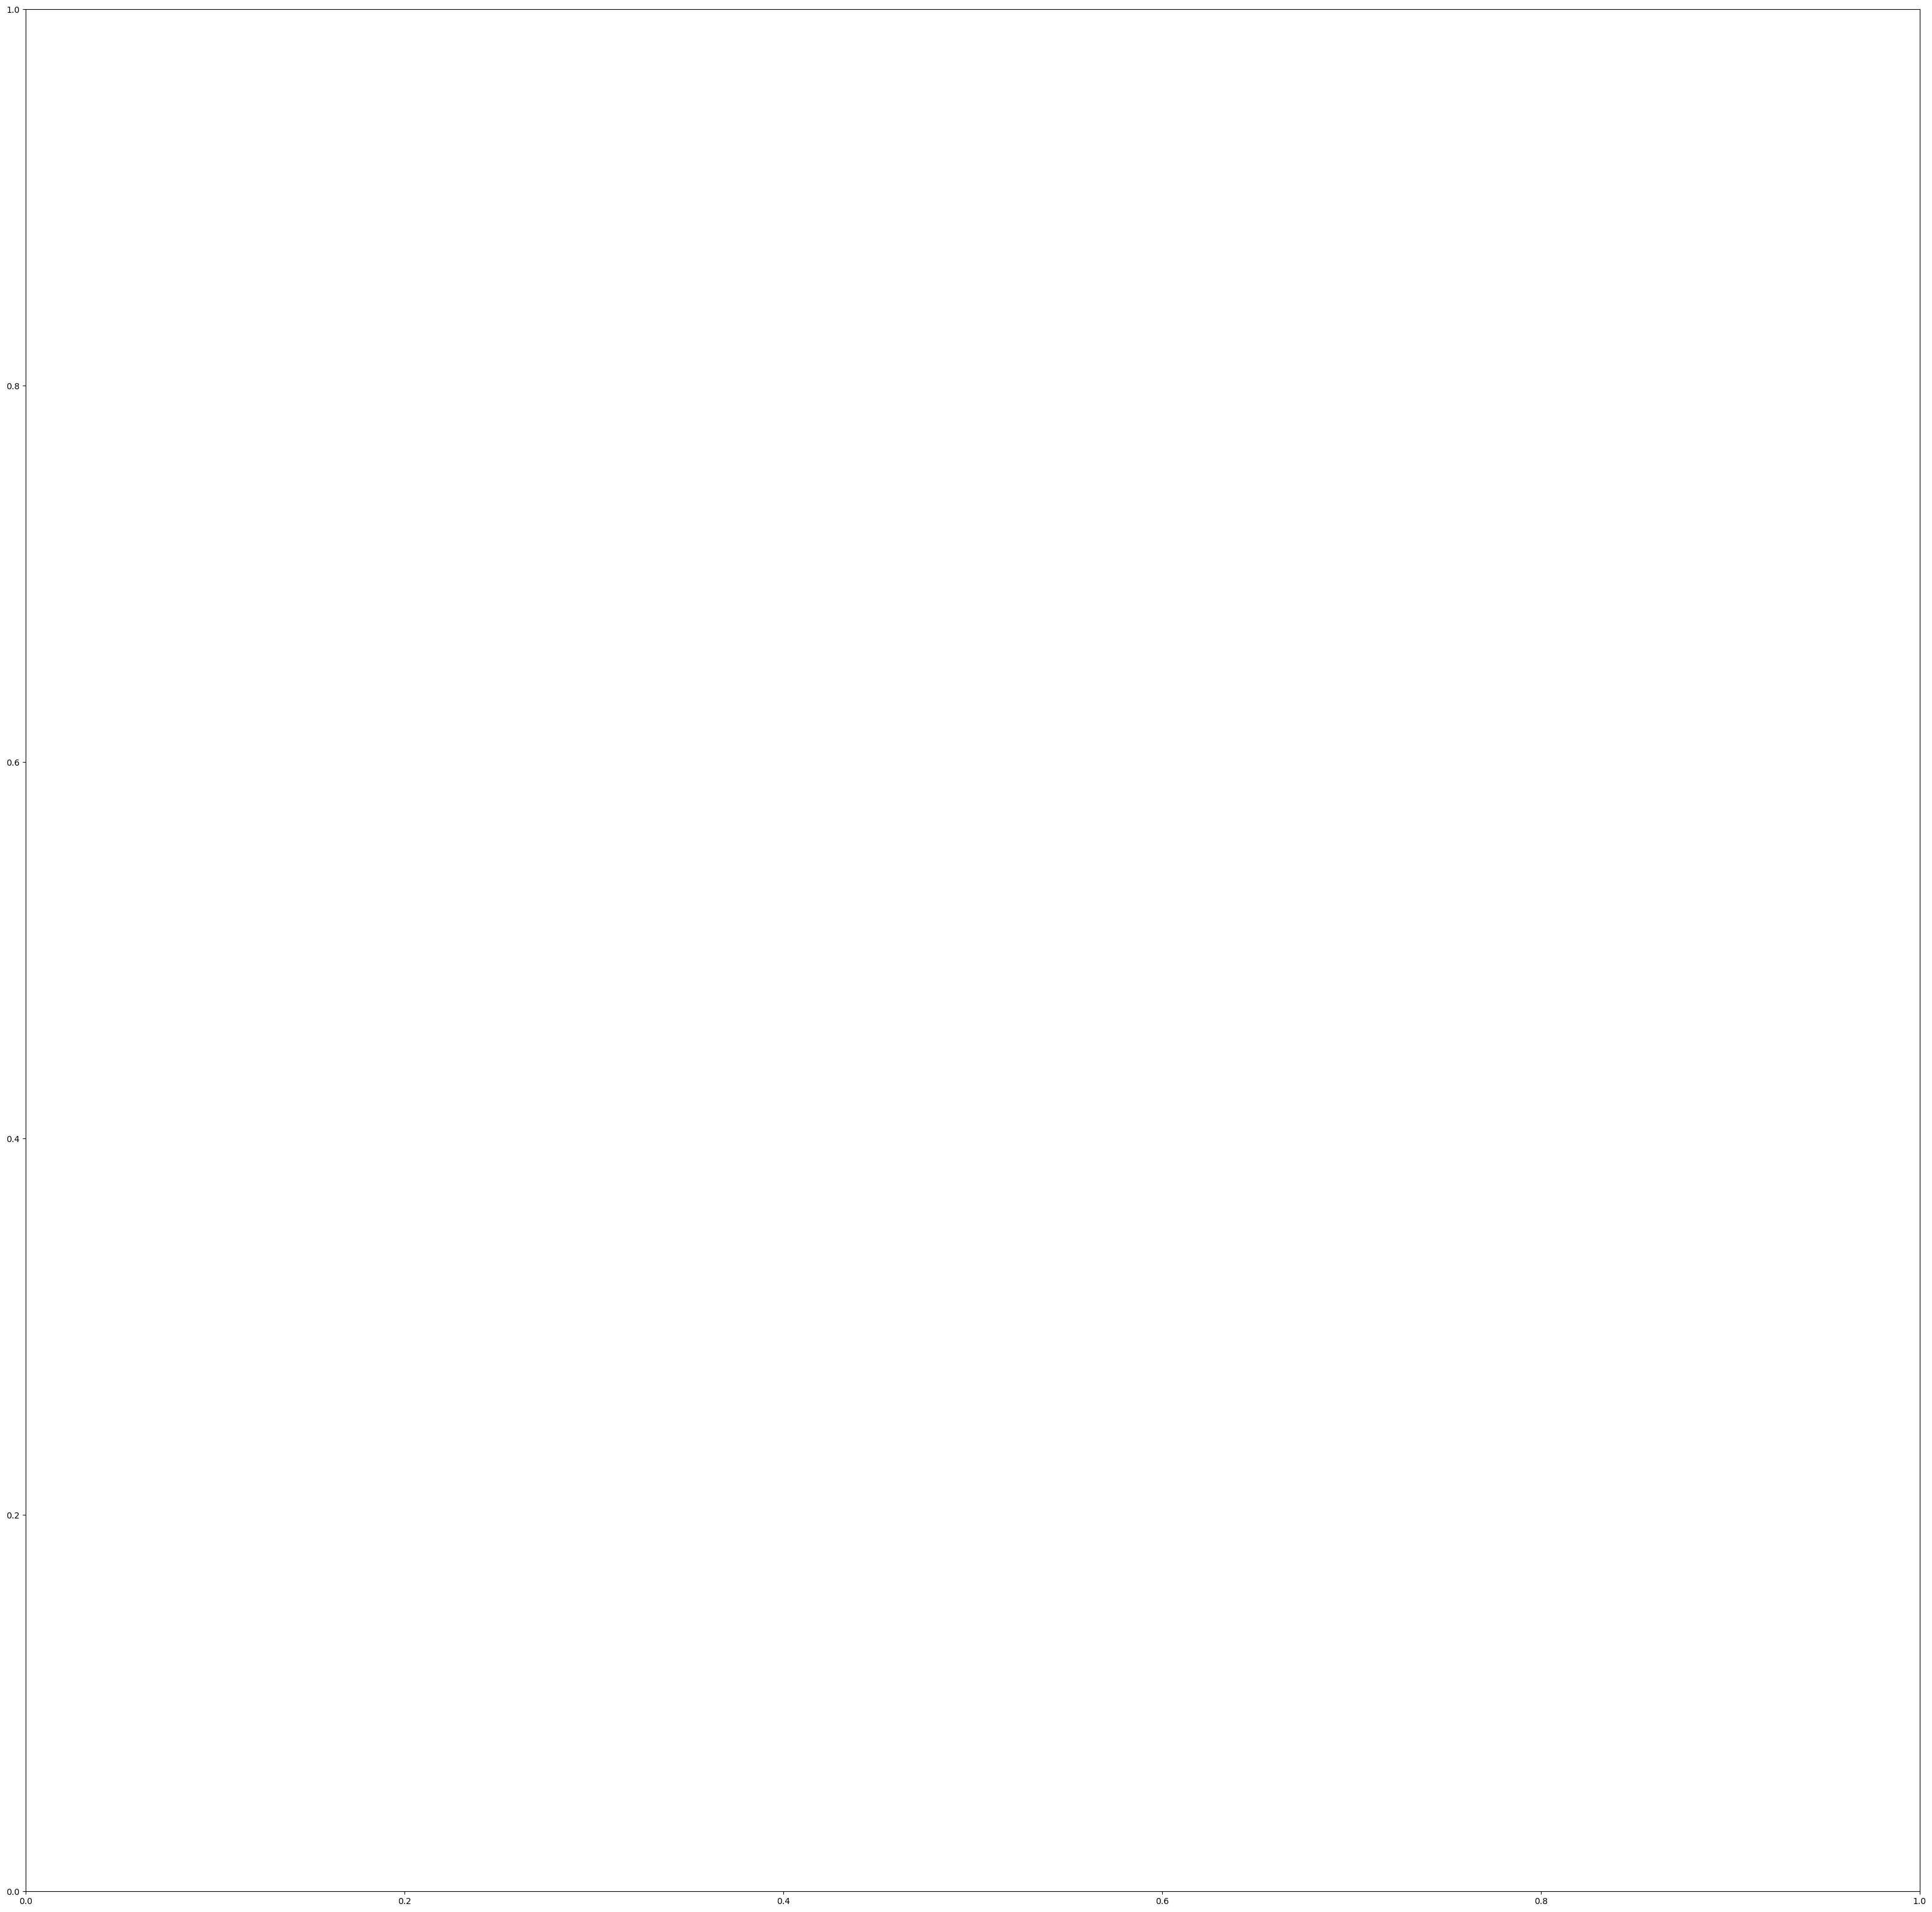

In [245]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(40,40))
corr1 = df_ord_encode.corr('spearman')
sns.heatmap(corr1, ax=ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
